In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display

In [2]:
import sys
sys.path.insert(1, '../')

from src import analysis, preprocessing

# Enable module reloading
%load_ext autoreload
%autoreload 2

pd.set_option('display.max_columns', None)

In [38]:
plt.rcParams['figure.figsize'] = (10, 6)
%config InlineBackend.figure_format='retina'
plt.rcParams.update({'font.size': 15})

In [3]:
single_col = analysis.SingleColAnalyser()
col_trans = preprocessing.ColumnTransformer()

# Datasets exploration

In our work we will be using data from 4 datasets:
 - *Books* - contains metadata about books available on Goodreads (specifically we have choosen Young adults genre)
 - *Reviews* - contains review text along with rating provided by users
 - *Interactions* - contains informations about user-book interactions
 - *Authors* - contains infromation about authors

 Now let's have better look at them.

## Books

In [170]:
books = pd.read_csv('../data/books.csv')

In [5]:
books.head(3)

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,similar_books,description,format,link,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,NaN,1,['147734'],US,NaN,"[{'count': '1057', 'name': 'to-read'}, {'count...",B0056A00P4,True,4.04,B0056A00P4,"['519546', '1295074', '21407416']",This is the final tale in the bestselling auth...,NaN,https://www.goodreads.com/book/show/12182387-t...,"[{'author_id': '50873', 'role': ''}, {'author_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.goodreads.com/book/show/12182387-t...,https://s.gr-assets.com/assets/nophoto/book/11...,12182387,4,285263,"The Passion (Dark Visions, #3)","The Passion (Dark Visions, #3)"
1,NaN,2,['425995'],US,NaN,"[{'count': '1010', 'name': 'to-read'}, {'count...",B006KLYIAG,True,3.80,B006KLYIAG,"['13400912', '13327517', '18107102', '15797097...",Life should be simple for Cassie.\nFor the sma...,NaN,https://www.goodreads.com/book/show/20135365-h...,"[{'author_id': '5395324', 'role': ''}]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.goodreads.com/book/show/20135365-h...,https://s.gr-assets.com/assets/nophoto/book/11...,20135365,5,18450480,Hope's Daughter,Hope's Daughter
2,0698143760,17,['493993'],US,NaN,"[{'count': '1799', 'name': 'fantasy'}, {'count...",NaN,True,3.80,NaN,"['15728807', '17182499', '15673520', '16081758...",Wanted by no one.\nHunted by everyone.\nSixtee...,ebook,https://www.goodreads.com/book/show/21401181-h...,"[{'author_id': '7314532', 'role': ''}]",Viking Children's,416.0,4.0,9780698143760,3.0,NaN,2014.0,https://www.goodreads.com/book/show/21401181-h...,https://images.gr-assets.com/books/1394747643m...,21401181,33,24802827,"Half Bad (Half Life, #1)","Half Bad (Half Life, #1)"


Some statistics for each column:

In [15]:
books.describe(exclude=np.number)

,isbn,series,country_code,language_code,popular_shelves,asin,is_ebook,kindle_asin,similar_books,description,format,link,authors,publisher,isbn13,edition_information,url,image_url,title,title_without_series
count,55555,93398,93398,63766,93398,17332,93398,45247,93398,89108,75389,93398,93398,74798,66580,7390,93398,93398,93398,93398
unique,55555,16885,1,73,44704,17332,2,23383,22069,70278,159,93398,25259,10257,66580,1905,93398,68495,55848,55848
top,6022200512,[],US,eng,"[{'count': '51038', 'name': 'favorites'}, {'co...",B006RVVBF4,False,B00AI5AQPQ,[],<>,Paperback,https://www.goodreads.com/book/show/12523.Sexy,"[{'author_id': '15872', 'role': ''}]",Simon Pulse,9781680463392,Unabridged,https://www.goodreads.com/book/show/12523.Sexy,https://s.gr-assets.com/assets/nophoto/book/11...,Matilda,Matilda
freq,1,38758,93398,35989,65,1,65575,35,16580,24,35946,1,415,1740,1,539,1,24904,73,73


In [16]:
books.describe()

,text_reviews_count,average_rating,num_pages,publication_day,publication_month,publication_year,book_id,ratings_count,work_id
count,93398.000000,93398.000000,71695.000000,64937.000000,71315.000000,77895.000000,9.339800e+04,9.339800e+04,9.339800e+04
mean,101.913189,3.860503,298.943539,12.538907,6.330323,2010.706104,1.682098e+07,1.351242e+03,2.023518e+07
std,1159.965407,0.345687,240.386195,9.648199,3.310877,96.504383,9.993895e+06,2.885759e+04,1.688406e+07
min,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,5.000000e+01,0.000000e+00,6.200000e+01
25%,3.000000,3.660000,224.000000,3.000000,4.000000,2010.000000,8.887362e+06,1.500000e+01,3.600396e+06
50%,9.000000,3.870000,296.000000,11.000000,6.000000,2012.000000,1.733140e+07,4.800000e+01,1.750882e+07
75%,29.000000,4.090000,368.000000,21.000000,9.000000,2015.000000,2.483025e+07,1.840000e+02,2.766992e+07
max,142645.000000,5.000000,52015.000000,31.000000,12.000000,20045.000000,3.652450e+07,4.899965e+06,5.837702e+07


In [11]:
books.shape

(93398, 29)

Books dataset contains 93398 books. But books can have different editions or publications in different languages. We assume that 'work_id' column in this dataset unites all different publications of same book. 

In [25]:
books.work_id.nunique()

34916

This indicates that we have 34916 unique books in our dataset (without considering other editions and publications). Let's have a look at same books with same work_id.

In [133]:
books[books['work_id'] == 285263]

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,similar_books,description,format,link,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,NaN,1,['147734'],US,NaN,"[{'count': '1057', 'name': 'to-read'}, {'count...",B0056A00P4,True,4.04,B0056A00P4,"['519546', '1295074', '21407416']",This is the final tale in the bestselling auth...,NaN,https://www.goodreads.com/book/show/12182387-t...,"[{'author_id': '50873', 'role': ''}, {'author_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.goodreads.com/book/show/12182387-t...,https://s.gr-assets.com/assets/nophoto/book/11...,12182387,4,285263,"The Passion (Dark Visions, #3)","The Passion (Dark Visions, #3)"
5623,067187456X,76,['147734'],US,NaN,"[{'count': '1057', 'name': 'to-read'}, {'count...",NaN,False,4.04,NaN,"['519546', '1295074', '21407416']",Betrayed!\nKaitlyn Fairchild and her four psyc...,Paperback,https://www.goodreads.com/book/show/293982.The...,"[{'author_id': '50873', 'role': ''}]",Simon Pulse,211.0,1.0,9780671874568,4.0,NaN,1995.0,https://www.goodreads.com/book/show/293982.The...,https://s.gr-assets.com/assets/nophoto/book/11...,293982,2730,285263,"The Passion (Dark Visions, #3)","The Passion (Dark Visions, #3)"
19340,1416984836,2,['147734'],US,NaN,"[{'count': '1057', 'name': 'to-read'}, {'count...",NaN,False,4.04,NaN,"['519546', '1295074', '21407416']",This is the final tale in the bestselling auth...,Paperback,https://www.goodreads.com/book/show/4907577-th...,"[{'author_id': '50873', 'role': ''}]",Simon Pulse,224.0,21.0,9781416984832,8.0,NaN,2008.0,https://www.goodreads.com/book/show/4907577-th...,https://s.gr-assets.com/assets/nophoto/book/11...,4907577,17,285263,"The Passion (Dark Visions, #3)","The Passion (Dark Visions, #3)"
25838,NaN,2,['147734'],US,slo,"[{'count': '1057', 'name': 'to-read'}, {'count...",NaN,False,4.04,NaN,"['519546', '1295074', '21407416']",Kaitlyn a jej priatelia vlastnia ulomok cisteh...,Paperback,https://www.goodreads.com/book/show/16151250-v-e,"[{'author_id': '50873', 'role': ''}, {'author_...",Fragment,255.0,NaN,9788080896591,NaN,NaN,2012.0,https://www.goodreads.com/book/show/16151250-v-e,https://images.gr-assets.com/books/1352991032m...,16151250,19,285263,"Vášeň (Temné vízie, #3)","Vášeň (Temné vízie, #3)"
26036,8854121789,3,['147734'],US,ita,"[{'count': '1057', 'name': 'to-read'}, {'count...",NaN,False,4.04,NaN,"['519546', '1295074', '21407416']","I ragazzi dello Zetes Institute sono in fuga, ...",Hardcover,https://www.goodreads.com/book/show/13560478-l...,"[{'author_id': '50873', 'role': ''}, {'author_...",Newton Compton (Vertigo),240.0,16.0,9788854121782,12.0,NaN,2010.0,https://www.goodreads.com/book/show/13560478-l...,https://images.gr-assets.com/books/1332700074m...,13560478,36,285263,"La Passione (Dark Visions, #3)","La Passione (Dark Visions, #3)"
26212,978802531,14,['147734'],US,cze,"[{'count': '1057', 'name': 'to-read'}, {'count...",NaN,False,4.04,NaN,"['519546', '1295074', '21407416']",Kaitlyn a jejim pratelum se podarilo ziskat ul...,Paperback,https://www.goodreads.com/book/show/16159801-v-e,"[{'author_id': '50873', 'role': ''}, {'author_...",Fragment,256.0,NaN,NaN,10.0,NaN,2012.0,https://www.goodreads.com/book/show/16159801-v-e,https://images.gr-assets.com/books/1353358964m...,16159801,61,285263,"Vášeň (Temné vize, #3)","Vášeň (Temné vize, #3)"
62091,1441859187,1,['147734'],US,NaN,"[{'count': '1057', 'name': 'to-read'}, {'count...",NaN,False,4.04,NaN,"['519546', '1295074', '21407416']",Kaitlyn Fairchild and her four psychic friends...,Audio CD,https://www.goodreads.com/book/show/7385668-th...,"[{'author_id': '50873', 'role': ''}, {'author_...",Brilliance Corporation,NaN,20.0,9781441859181,4.0,NaN,2010.0,https://www.goodreads.com/book/show/7385668-th...,https://s.gr-assets.com/assets/nophoto/book/11...,7385668,10,285263,"The Passion (Dark Visions

As we can see, we have 7 different publications of this book, some in different languages, ebook version and others. We assume that reviews for books in other languages than english would be in the same language as book, so we can drop these rows. During preprocessing we need to unit other editions of book to one record.

**Next step:** Are there any missing values?

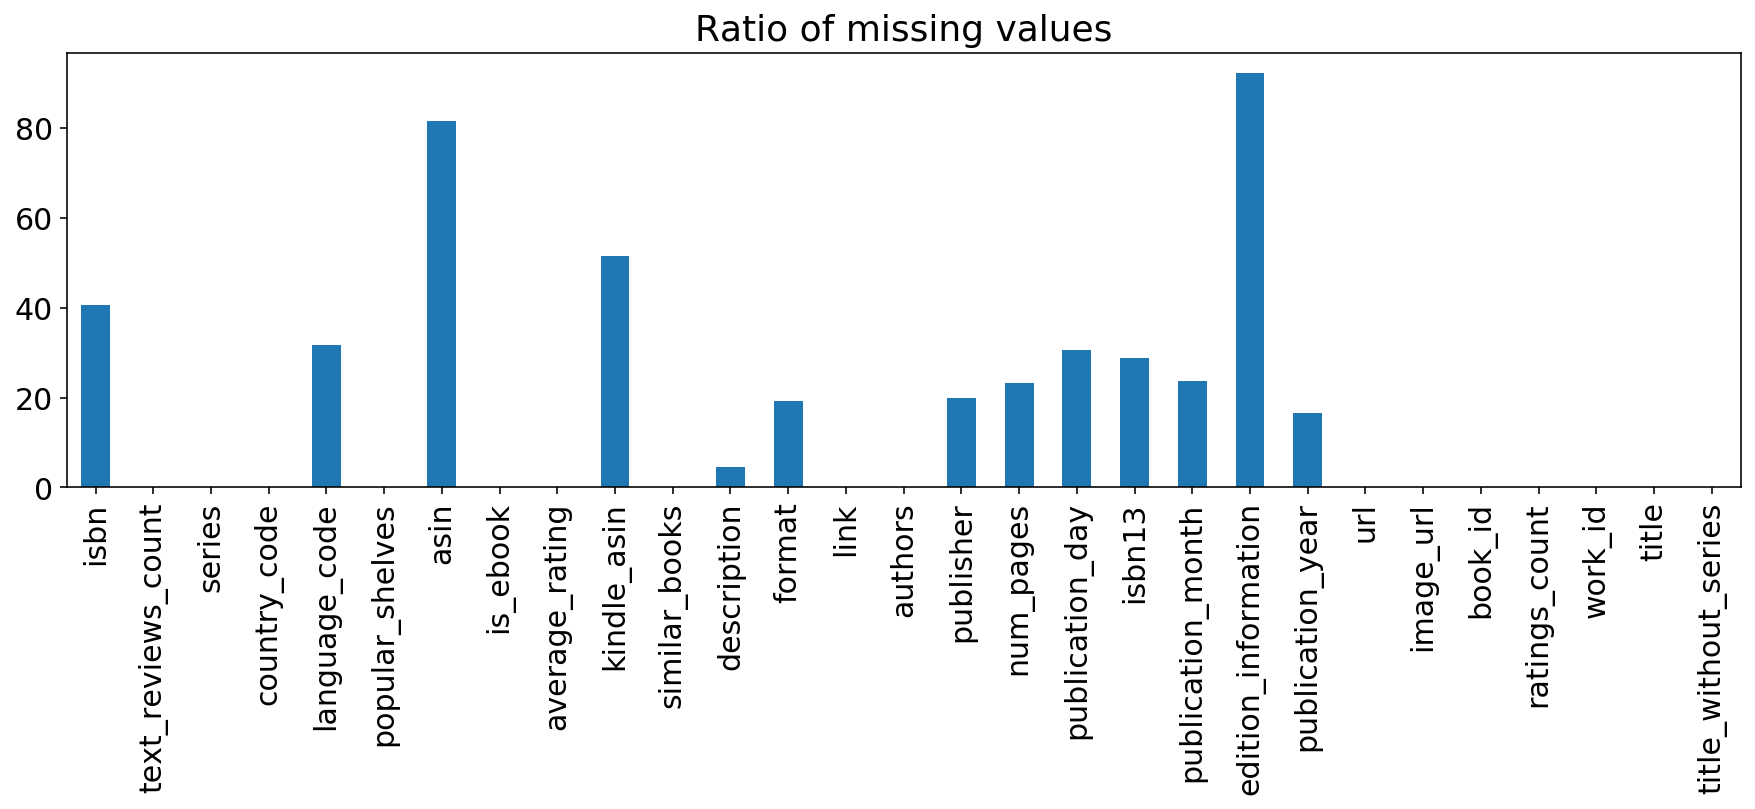

In [9]:
plt.figure(figsize=(15,4))
books.isna().sum().map(lambda x: (x / books.shape[0])* 100).plot(kind='bar',title = 'Ratio of missing values')

As we can see, there is a significant number of missing values in columns 'edition_information' and 'asin', but these properties don't seem to be useful for us, so we can deal with them later in preprocessing by dropping them.

Now, let's have a better look at some interesting columns.

In [20]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93398 entries, 12182387 to 17805813
Data columns (total 28 columns):
isbn                    55555 non-null object
text_reviews_count      93398 non-null int64
series                  93398 non-null object
country_code            93398 non-null object
language_code           63766 non-null object
popular_shelves         93398 non-null object
asin                    17332 non-null object
is_ebook                93398 non-null bool
average_rating          93398 non-null float64
kindle_asin             45247 non-null object
similar_books           93398 non-null object
description             89108 non-null object
format                  75389 non-null object
link                    93398 non-null object
authors                 93398 non-null object
publisher               74798 non-null object
num_pages               71695 non-null float64
publication_day         64937 non-null float64
isbn13                  66580 non-null object
publica

In next section we are going to analyse potentionally interesting atrributes for our task. Some attributes, which we aren't going to use for sure won't be analysed properly (like 'asin', 'kindle_asin', etc.).

### Text review count

count     93398.000000
mean        101.913189
std        1159.965407
min           0.000000
25%           3.000000
50%           9.000000
75%          29.000000
max      142645.000000
Name: text_reviews_count, dtype: float64

missing values: 0/93398 (0.0%)
outliers upper: 12626/93398 (13.518490759973448%)
outliers lower: 0/93398 (0.0%)



(<Figure size 1080x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BB0A8742B0>,
       dtype=object))

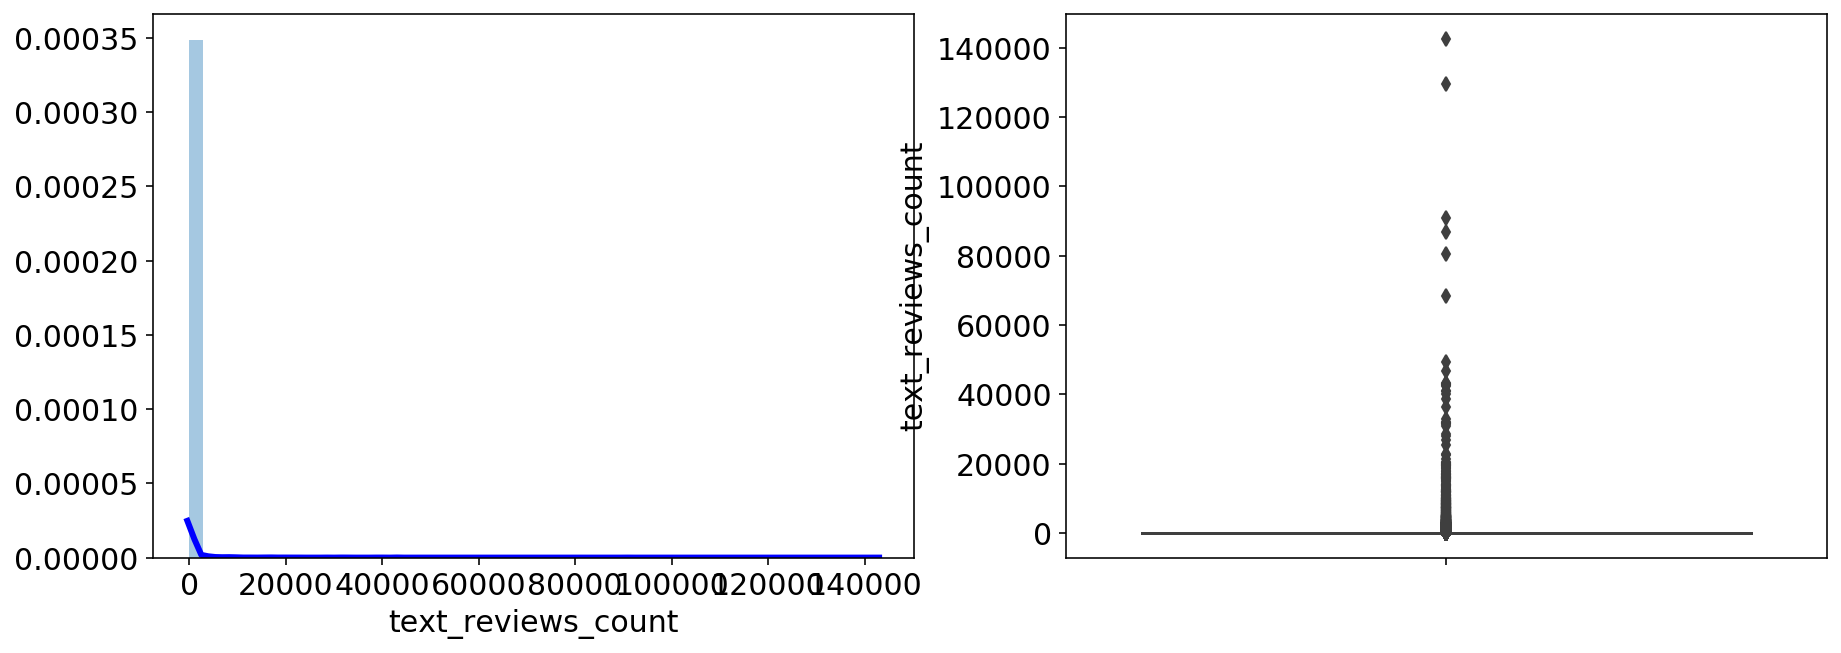

In [39]:
single_col.analyze_numeric(books, 'text_reviews_count')

There are huge differences between books, many of them are having number of reviews between 0-10 (more than half). And only the top 25% has at least 29 reviews.

### Rating count

count    9.339800e+04
mean     1.351242e+03
std      2.885759e+04
min      0.000000e+00
25%      1.500000e+01
50%      4.800000e+01
75%      1.840000e+02
max      4.899965e+06
Name: ratings_count, dtype: float64

missing values: 0/93398 (0.0%)
outliers upper: 13871/93398 (14.851495749373647%)
outliers lower: 0/93398 (0.0%)



(<Figure size 1080x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f03088df0>,
       dtype=object))

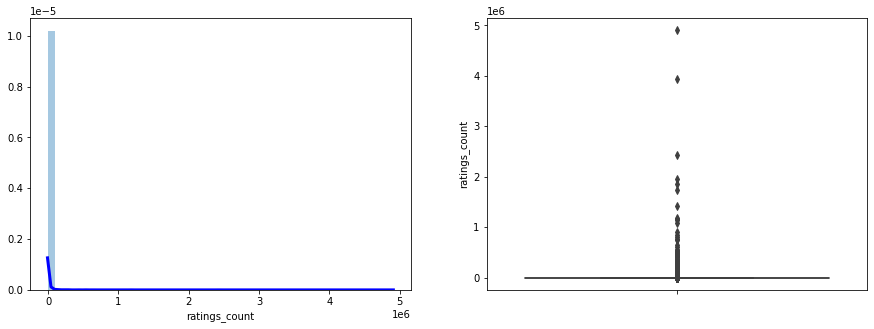

In [11]:
single_col.analyze_numeric(books, 'ratings_count')

Again - there are huge differences in the dataset. The half of the books have less than 48 ratings.

### Number of pages

count    71695.000000
mean       298.943539
std        240.386195
min          0.000000
25%        224.000000
50%        296.000000
75%        368.000000
max      52015.000000
Name: num_pages, dtype: float64

missing values: 21703/93398 (0.23237114285102464%)
outliers upper: 1322/93398 (1.4154478682627036%)
outliers lower: 927/93398 (0.9925266065654511%)



(<Figure size 1080x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8efa036e50>,
       dtype=object))

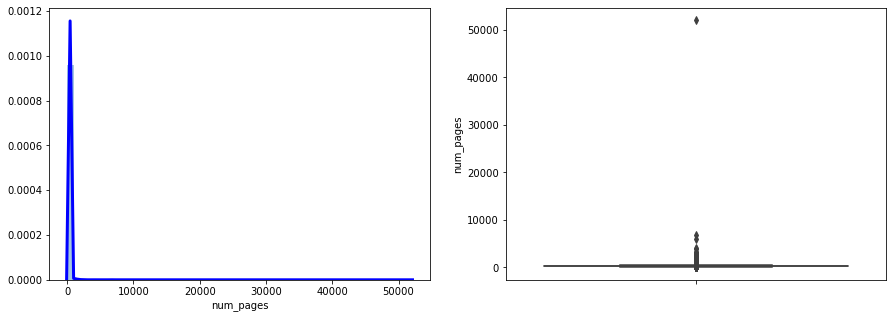

In [42]:
single_col.analyze_numeric(books,'num_pages')

There is a book with 52015 pages, which mades the graphs unreadable, we will take a look at that book and then try to analyse graphs without that specific book

In [45]:
books[books.num_pages > 50000]

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,similar_books,description,format,link,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
30508,NaN,1,['387569'],US,eng,"[{'count': '132', 'name': 'to-read'}, {'count'...",NaN,False,3.79,NaN,"['9663929', '12923321', '13316241', '13429646'...",When Perry ends up in Venice on a European tou...,Audiobook,https://www.goodreads.com/book/show/20612029-p...,"[{'author_id': '263547', 'role': ''}]",Recorded Books,52015.0,NaN,NaN,NaN,NaN,2012.0,https://www.goodreads.com/book/show/20612029-p...,https://s.gr-assets.com/assets/nophoto/book/11...,20612029,2,18729385,"Perry's Killer Playlist (Perry & Gobi, #2)","Perry's Killer Playlist (Perry & Gobi, #2)"


count    71694.000000
mean       298.222194
std        143.109073
min          0.000000
25%        224.000000
50%        296.000000
75%        368.000000
max       6750.000000
Name: num_pages, dtype: float64

missing values: 0/71694 (0.0%)
outliers upper: 1321/71694 (1.8425530727815438%)
outliers lower: 927/71694 (1.292995229726337%)



(<Figure size 1080x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f02095880>,
       dtype=object))

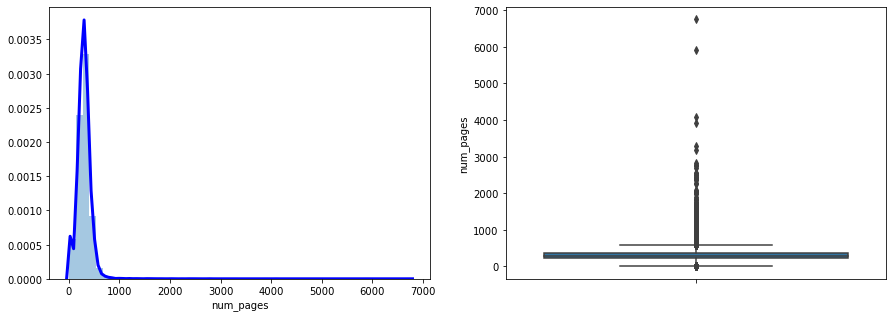

In [46]:
single_col.analyze_numeric(books[books.num_pages < 50000],'num_pages')

Maybe (but likely not) there exist some sort of correlation correlation between ratings and number of pages

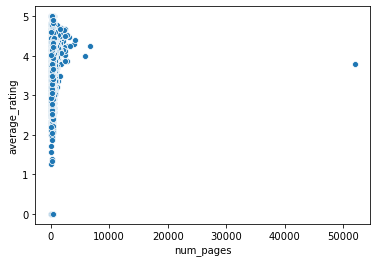

In [54]:
ax = sns.scatterplot(x="num_pages", y="average_rating", data=books)

### Average rating

Even if it's more a categoric property, it's ordinal, so we can try to analyse it similarily like numeric atributes

count    93398.000000
mean         3.860503
std          0.345687
min          0.000000
25%          3.660000
50%          3.870000
75%          4.090000
max          5.000000
Name: average_rating, dtype: float64

missing values: 0/93398 (0.0%)
outliers upper: 366/93398 (0.39187134628150494%)
outliers lower: 1276/93398 (1.3661962782928971%)



(<Figure size 1080x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f02f2c490>,
       dtype=object))

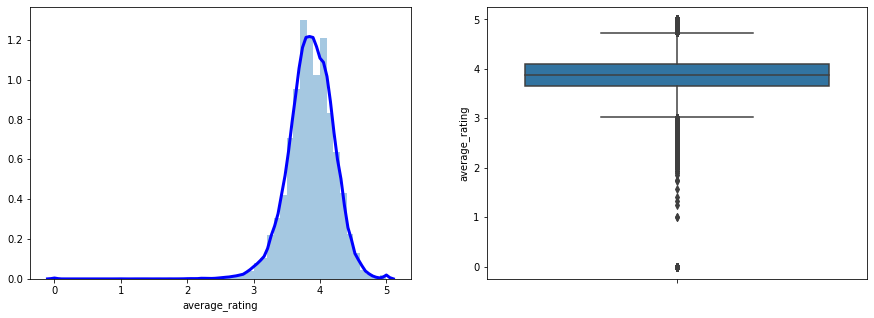

In [12]:
single_col.analyze_numeric(books, 'average_rating')

The distribution of values here is more like normal distribution with median and mean around 3,86.

### Popular shelves

This attribute can be interesting for our task. Tags can indicate that some books are more popular than others and more readers are enjoying them (for example tag 'favourites'). For further use we need to extract values of tags to separate columns during preproccesing. Later these values can help us to distinguish popularity of various books among users.

In [49]:
books.popular_shelves.describe().top

"[{'count': '51038', 'name': 'favorites'}, {'count': '36703', 'name': 'currently-reading'}, {'count': '33494', 'name': 'to-read'}, {'count': '26318', 'name': 'young-adult'}, {'count': '14025', 'name': 'fiction'}, {'count': '13168', 'name': 'dystopian'}, {'count': '11243', 'name': 'dystopia'}, {'count': '11000', 'name': 'fantasy'}, {'count': '10995', 'name': 'ya'}, {'count': '8926', 'name': 'science-fiction'}, {'count': '7245', 'name': 'books-i-own'}, {'count': '6345', 'name': 'sci-fi'}, {'count': '5094', 'name': 'series'}, {'count': '5069', 'name': 'owned'}, {'count': '4229', 'name': 'favourites'}, {'count': '3390', 'name': 'romance'}, {'count': '3200', 'name': 'adventure'}, {'count': '2911', 'name': 'hunger-games'}, {'count': '2017', 'name': 'book-club'}, {'count': '1999', 'name': 'kindle'}, {'count': '1779', 'name': 'teen'}, {'count': '1478', 'name': 'read-in-2012'}, {'count': '1465', 'name': 'post-apocalyptic'}, {'count': '1464', 'name': 'my-books'}, {'count': '1443', 'name': 'the-h

In [53]:
books.popular_shelves.nunique()

44704

As we can see above, there are various types of titles for favourites book shelf. For example 'favorites', 'favorite', 'favourite-books', 'favourite', 'my-favorites', 'all-time-favorites' all mean that books in them are 
readers' favourite. In preproccesing we need to unit them to one title and then extract values from them.

Some books are having the exact same shelves, it can indicate, that for example traslations aren't counted 


We will take a look at the default shelves: 'favorites', 'currently-reading', 'to-read')

In [6]:
shelves_db = col_trans.export_book_shelves(books, 'popular_shelves', ['favorites', 'currently-reading', 'to-read'])

In [29]:
shelves_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93398 entries, 0 to 93397
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   favorites          73297 non-null  object
 1   currently-reading  84577 non-null  object
 2   to-read            92840 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


There are several problems with this dataframe: there are nan values + the type of the columns are "objects"

nan values indicates, that there is not a shelve with that statement, so we can interpret it as 0.

In [34]:
shelves_db = shelves_db.fillna(value={'favorites': 0, 'currently-reading': 0, 'to-read': 0})

shelves_db.isna().sum()

favorites            0
currently-reading    0
to-read              0
dtype: int64

next we trasnform the columns to int

In [38]:
shelves_db['favorites'] = shelves_db['favorites'].astype(int)
shelves_db['currently-reading'] = shelves_db['currently-reading'].astype(int)
shelves_db['to-read'] = shelves_db['to-read'].astype(int)

In [39]:
shelves_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93398 entries, 0 to 93397
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   favorites          93398 non-null  int64
 1   currently-reading  93398 non-null  int64
 2   to-read            93398 non-null  int64
dtypes: int64(3)
memory usage: 2.1 MB


Now we can add these data to books and analyze them

In [171]:
books = books.join(shelves_db)

### favorities shelve


count    93398.000000
mean       678.532495
std       3146.157638
min          0.000000
25%          1.000000
50%         12.000000
75%        144.000000
max      51045.000000
Name: favorites, dtype: float64

missing values: 0/93398 (0.0%)
outliers upper: 15696/93398 (16.8054990470888%)
outliers lower: 0/93398 (0.0%)



(<Figure size 1080x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe827a39ee0>,
       dtype=object))

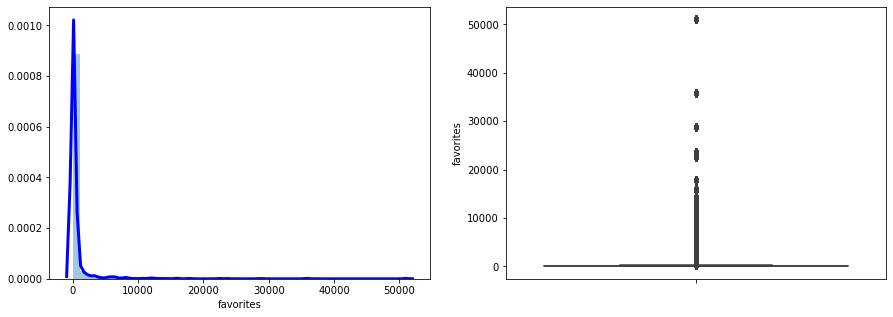

In [45]:
single_col.analyze_numeric(books, 'favorites')

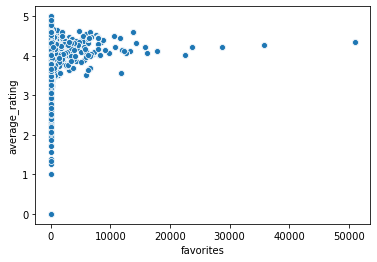

In [55]:
ax = sns.scatterplot(x="favorites", y="average_rating", data=books)

### currently read shelve

count    93398.000000
mean       583.418157
std       2669.042040
min          0.000000
25%          4.000000
50%         30.000000
75%        176.000000
max      36705.000000
Name: currently-reading, dtype: float64

missing values: 0/93398 (0.0%)
outliers upper: 14001/93398 (14.990685025375276%)
outliers lower: 0/93398 (0.0%)



(<Figure size 1080x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe81e80f910>,
       dtype=object))

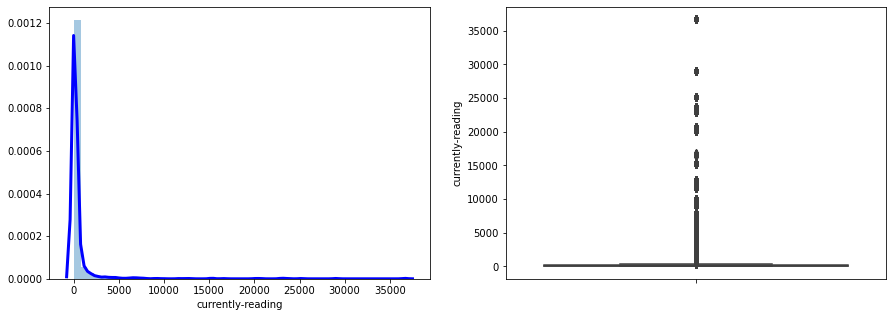

In [57]:
single_col.analyze_numeric(books, 'currently-reading')

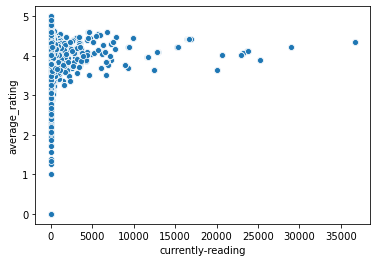

In [59]:
ax = sns.scatterplot(x="currently-reading", y="average_rating", data=books)

### to read

count     93398.000000
mean      11138.121170
std       40369.241749
min           0.000000
25%         218.000000
50%        1185.000000
75%        5480.000000
max      543317.000000
Name: to-read, dtype: float64

missing values: 0/93398 (0.0%)
outliers upper: 13161/93398 (14.091308165057068%)
outliers lower: 0/93398 (0.0%)



(<Figure size 1080x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8325a9ee0>,
       dtype=object))

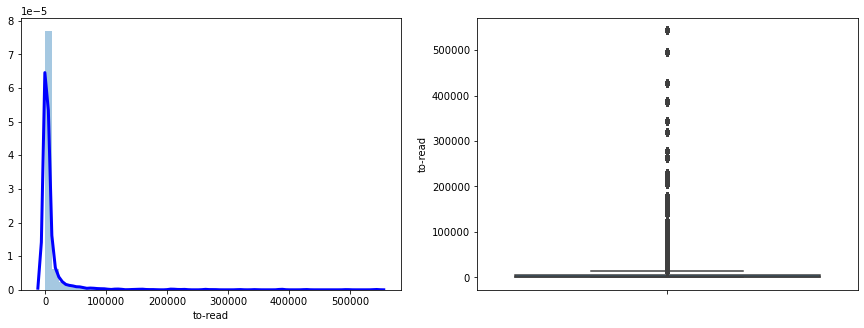

In [60]:
single_col.analyze_numeric(books, 'to-read')

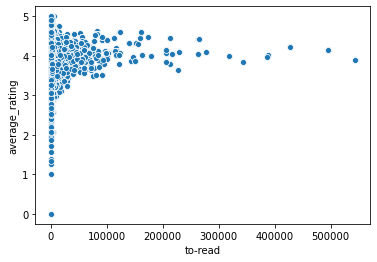

In [61]:
ax = sns.scatterplot(x="to-read", y="average_rating", data=books)

## Similar books

In [21]:
books.similar_books

0                        ['519546', '1295074', '21407416']
1        ['13400912', '13327517', '18107102', '15797097...
2        ['15728807', '17182499', '15673520', '16081758...
3        ['25861113', '7430195', '18765937', '6120544',...
4        ['20499652', '17934493', '13518102', '16210411...
                               ...                        
93393    ['11413298', '13508069', '7849034', '10552965'...
93394    ['8574517', '6440071', '6625948', '7036227', '...
93395    ['1957880', '2490879', '8030321', '13152142', ...
93396    ['26802671', '20662291', '23615716', '23870836...
93397    ['18868682', '18171572', '15795797', '16120595...
Name: similar_books, Length: 93398, dtype: object

Rating of similar books may indicate the rating of concrete book, but in that case we need to know the rating for that specific person, which may not exist.

### Country code

In [69]:
books['country_code'].value_counts()

US    93398
Name: country_code, dtype: int64

As we can see, 'country_code' column contains only single value, so it isnt useful for us to determine origin of books.


### Language code

In [73]:
books['language_code'].value_counts()

eng      35989
en-US     4996
en-GB     2922
ger       2798
spa       2511
         ...  
glg          1
hye          1
nld          1
mar          1
mon          1
Name: language_code, Length: 73, dtype: int64

Most books are written in english language. As we can see, we have 3 different codes for this language. 

### Is ebook

count     93398
unique        2
top       False
freq      65575
Name: is_ebook, dtype: object
Ratio of True: 29.789717124563694%
Ratio of False: 70.2102828754363%


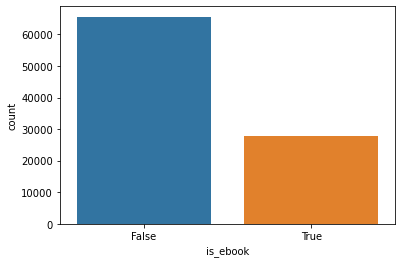

In [13]:
single_col.analyze_category(books,'is_ebook')

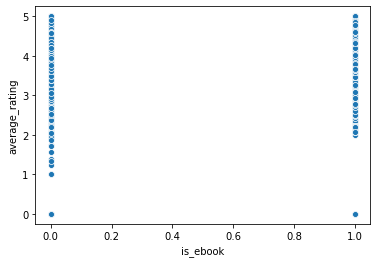

In [26]:
ax = sns.scatterplot(x="is_ebook", y="average_rating", data=books)

70% of books aren't e-books. In furhter analysis we will take a look at correlation between being an e-book and number of reviews

### Format

In [64]:
books.format.value_counts()[:10]

Paperback                35946
Hardcover                15684
ebook                     9467
Kindle Edition            7136
Audio CD                  2085
Audiobook                 1537
Mass Market Paperback     1237
Audible Audio              584
Audio                      528
Library Binding            225
Name: format, dtype: int64

As we can see there are quite few different formats of books. It can be interesting to see if there is any correlation between format and rating.

### Authors

In [45]:
books.authors

0        [{'author_id': '50873', 'role': ''}, {'author_...
1                   [{'author_id': '5395324', 'role': ''}]
2                   [{'author_id': '7314532', 'role': ''}]
3                    [{'author_id': '293603', 'role': ''}]
4                   [{'author_id': '4018722', 'role': ''}]
                               ...                        
93393               [{'author_id': '3353516', 'role': ''}]
93394               [{'author_id': '3081700', 'role': ''}]
93395    [{'author_id': '348478', 'role': ''}, {'author...
93396                 [{'author_id': '11664', 'role': ''}]
93397               [{'author_id': '4633056', 'role': ''}]
Name: authors, Length: 93398, dtype: object

Authors column will need some extra work during preprocessing. As we can see, for each book we have 'author_id' and 'role' which is always empty. Apart from this, some books have more than 1 author. To solve this problem we will replace authors with their averege rating value.

In [64]:
import json

In [70]:
authors = pd.read_csv("../data/authors.csv")

In [72]:
authors.head(3)

,average_rating,author_id,text_reviews_count,name,ratings_count
0,3.98,604031,7,Ronald J. Fields,49
1,4.08,626222,28716,Anita Diamant,546796
2,3.92,10333,5075,Barbara Hambly,122118


In [225]:
authors.shape

(829529, 5)

In [73]:
authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829529 entries, 0 to 829528
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   average_rating      829529 non-null  float64
 1   author_id           829529 non-null  int64  
 2   text_reviews_count  829529 non-null  int64  
 3   name                829524 non-null  object 
 4   ratings_count       829529 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 31.6+ MB


In [84]:
authors.shape

(829529, 5)

In [177]:
author_ratings = col_trans.export_book_authors_average_value(books, authors)

In [160]:
author_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93398 entries, 0 to 93397
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   authors_average_rating  93398 non-null  object
dtypes: object(1)
memory usage: 729.8+ KB


In [178]:
author_ratings['authors_average_rating'] = author_ratings['authors_average_rating'].astype(float)

In [179]:
author_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93398 entries, 0 to 93397
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   authors_average_rating  93398 non-null  float64
dtypes: float64(1)
memory usage: 729.8 KB


In [182]:
books = books.join(author_ratings)

In [ ]:
single_col.analyze_numeric()

count    93398.000000
mean         3.875297
std          0.257480
min          0.000000
25%          3.720000
50%          3.880000
75%          4.040000
max          5.000000
Name: authors_average_rating, dtype: float64

missing values: 0/93398 (0.0%)
outliers upper: 516/93398 (0.5524743570526135%)
outliers lower: 1305/93398 (1.3972461937086447%)



(<Figure size 1080x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe80e28e700>,
       dtype=object))

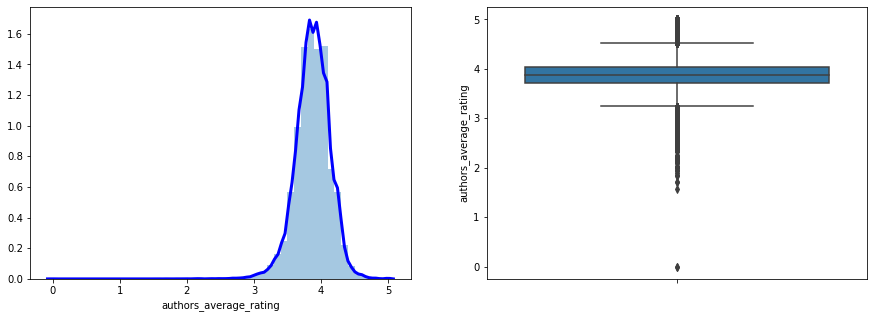

In [183]:
single_col.analyze_numeric(books, 'authors_average_rating')

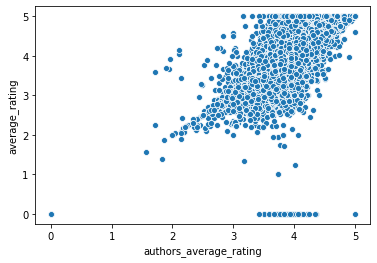

In [184]:
ax = sns.scatterplot(x="authors_average_rating", y="average_rating", data=books)

The (average) popularity of authors book may indicate the possible rating of a new book from that concrete author.

### Correlation of attributes¶


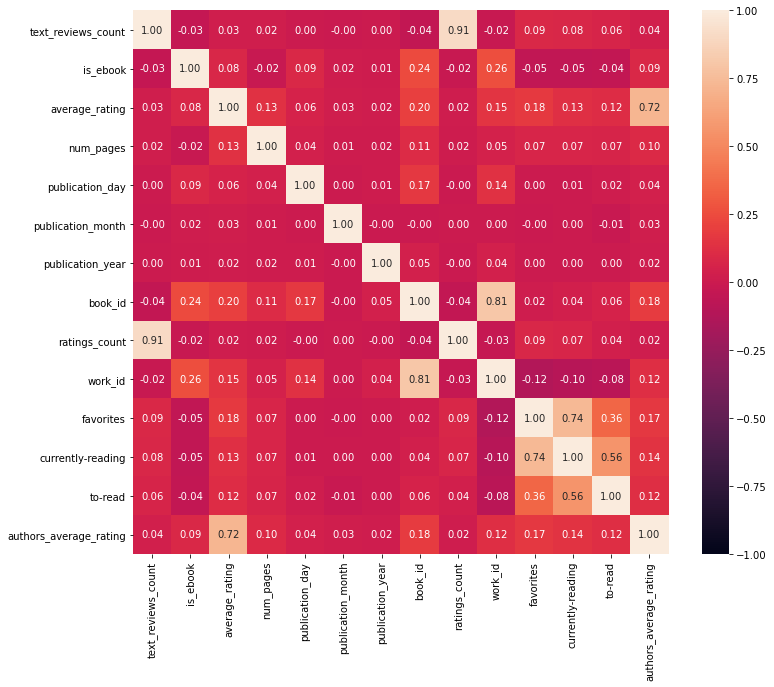

In [185]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(books.corr(), annot=True, fmt=".2f", vmin=-1.0, vmax=1.0)

As we can see, there is strong correlation between 'ratings_count' and 'text_reviews_count' columns, but it isnt as much interesting information, because we knew these values are linked together (the same applies to 'book_id' and 'work_id').

## Key Observations of Books Dataset
The interesting numeric columns are (for our task):
- text_reviews_count - it indicates, whether we are having enougn data (enough reviews/book)
- rating_count - it may have correlation with text reviews sentiment etc.

The interesting categorical columns are (for our task):
- average_rating - it's a ordinal categorical value from 0 to 5
- is_ebook - maybe it may have some correlation with number of rating
- language_code - it can affect the number of English reviews

Columns, which may be interesting after preprocessing:
- popular_shelves - books from the same category may have similar ratings (?)
- authors - books from the same authors may have similar ratings

## Reviews

In [85]:
reviews = pd.read_csv('../data/reviews.csv')

In [86]:
reviews.head(3)

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,2767052,248c011811e945eca861b5c31a549291,5,I cracked and finally picked this up. Very enj...,Wed Jan 13 13:38:25 -0800 2010,Wed Mar 22 11:46:36 -0700 2017,Sun Mar 25 00:00:00 -0700 2012,Fri Mar 23 00:00:00 -0700 2012,24,25
1,7504b2aee1ecb5b2872d3da381c6c91e,23302416,84c0936a0f9868f38e75d2f9a5cb761e,5,I read this book because my fifth grade son wa...,Wed Jan 21 18:40:59 -0800 2015,Wed Oct 26 03:44:13 -0700 2016,NaN,NaN,0,0
2,f8a89075dc6de14857561522e729f82c,18053080,785c8db878f4009da9741dea51f641da,4,Though the book started out slow and only star...,Sat Jan 11 17:58:41 -0800 2014,Tue Dec 02 11:43:07 -0800 2014,Sat Apr 12 00:00:00 -0700 2014,Fri Apr 11 00:00:00 -0700 2014,0,0


Some statistics for each column:

In [87]:
reviews.describe(exclude=np.number)

,user_id,review_id,review_text,date_added,date_updated,read_at,started_at
count,2389900,2389900,2388621,2389900,2389900,2041459,1579237
unique,209152,2389900,2296734,2371220,2340529,828792,88651
top,59151b639f247aa97fffd5c71701db29,4af130e3e90241d8de3b33aeb40fdc96,3.5,Sun Feb 01 00:00:00 -0800 2015,Sun Aug 04 08:29:24 -0700 2013,Fri Jan 01 00:00:00 -0800 2016,Fri Jan 01 00:00:00 -0800 2016
freq,2438,1,4284,34,37,5130,2274


In [88]:
reviews.describe()

,book_id,rating,n_votes,n_comments
count,2.389900e+06,2.389900e+06,2.389900e+06,2.389900e+06
mean,1.352580e+07,3.764296e+00,1.269322e+00,3.033106e-01
std,8.617060e+06,1.259770e+00,1.030308e+01,2.460205e+00
min,5.000000e+01,0.000000e+00,-3.000000e+00,-3.000000e+00
25%,7.238737e+06,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.298713e+07,4.000000e+00,0.000000e+00,0.000000e+00
75%,1.869243e+07,5.000000e+00,1.000000e+00,0.000000e+00
max,3.652450e+07,5.000000e+00,3.942000e+03,9.220000e+02


In [89]:
reviews.shape

(2389900, 11)

Dataset contains 2389900 reviews mapped to books by book_id. It can be interesting to see some reviews and ratings distribution per book or per user.

In [92]:
reviews.book_id.nunique()

93267

In [93]:
reviews.user_id.nunique()

209152

As we can see, we have 209152 reviews from unique users and 93267 reviews per unique books. As we saw in previous dataset book_id contains lot of different publications and editions of books we wanted to unit together, so we need to keep in mind that reviews are mapped by 'book_id', not 'work_id'. 

In [131]:
reviews[reviews['book_id'] == 23302416].head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,word_count
1,7504b2aee1ecb5b2872d3da381c6c91e,23302416,84c0936a0f9868f38e75d2f9a5cb761e,5,I read this book because my fifth grade son wa...,Wed Jan 21 18:40:59 -0800 2015,Wed Oct 26 03:44:13 -0700 2016,NaN,NaN,0,0,43
3088,289be7848fe7472db1d604c97d74ef9f,23302416,542e89c5afd83c6321a448b426bc5765,5,Favorite book of 2014. I think everyone should...,Fri Oct 31 11:30:02 -0700 2014,Wed Oct 26 02:45:00 -0700 2016,NaN,NaN,1,1,84
3643,bed815effc10c9154511959d6a008175,23302416,7b77d7dff08d57b861ab3fe74ac5e623,5,That was the most fantastic read!!! It made me...,Sun Jan 25 16:48:18 -0800 2015,Wed Oct 26 03:47:46 -0700 2016,NaN,Sun Jan 25 00:00:00 -0800 2015,0,0,16
6335,9e325fa532d5a32ee570109424a1d6e8,23302416,4b38aef8f6c48e0c0a8b01d232abd151,5,"If you want my honest opinion, just read this ...",Thu Mar 12 07:03:38 -0700 2015,Sat Apr 29 15:55:36 -0700 2017,Sat Apr 29 15:55:36 -0700 2017,Mon Mar 27 00:00:00 -0700 2017,0,0,90
6958,7673e2cf787978e68883d0584a4e2797,23302416,8bab4da502bc8f6c132d8d81ff0620b4,4,** spoiler alert ** \n 4.5/5 \n It was really ...,Thu Jun 18 07:13:13 -0700 2015,Sat Oct 29 10:44:44 -0700 2016,Wed Sep 16 00:00:00 -0700 2015,Tue Sep 08 00:00:00 -0700 2015,0,0,88


In [134]:
books[books['book_id'] == 23302416]

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,similar_books,description,format,link,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
52083,NaN,10175,['632090'],US,eng,"[{'count': '263587', 'name': 'to-read'}, {'cou...",NaN,False,4.43,NaN,"['18225037', '13262061', '10047243', '13503146...",You can't blend in when you were born to stand...,Paperback,https://www.goodreads.com/book/show/23302416-w...,"[{'author_id': '4859212', 'role': ''}, {'autho...",Corgi Childrens,410.0,3.0,NaN,1.0,Alternative Cover Edition ISBN: 9780552565974,2013.0,https://www.goodreads.com/book/show/23302416-w...,https://images.gr-assets.com/books/1412358842m...,23302416,116692,16319487,Wonder,Wonder


Above we can see same reviews for book with title *Wonder* in our books dataset. 

In [99]:
reviews[reviews['user_id'] == 'f8a89075dc6de14857561522e729f82c']

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
2,f8a89075dc6de14857561522e729f82c,18053080,785c8db878f4009da9741dea51f641da,4,Though the book started out slow and only star...,Sat Jan 11 17:58:41 -0800 2014,Tue Dec 02 11:43:07 -0800 2014,Sat Apr 12 00:00:00 -0700 2014,Fri Apr 11 00:00:00 -0700 2014,0,0
3,f8a89075dc6de14857561522e729f82c,17383543,34dc3c45d07e82718b05e73167259aef,2,"*Update - 10/27/13* - After some sleep, I thin...",Sun Apr 21 19:42:28 -0700 2013,Fri Aug 15 07:55:01 -0700 2014,Sat Oct 26 00:00:00 -0700 2013,Fri Oct 25 00:00:00 -0700 2013,0,0
4,f8a89075dc6de14857561522e729f82c,16651458,d8d6b590780256fef7ae4a9550fe3e0d,5,"This is a moving, heartbreaking, view into a l...",Fri Jan 11 11:42:42 -0800 2013,Fri Mar 01 09:31:01 -0800 2013,Mon Jan 14 00:00:00 -0800 2013,Sat Jan 12 00:00:00 -0800 2013,0,0
5,f8a89075dc6de14857561522e729f82c,10782699,972ce1267de0213e3032c685386890e6,5,I never thought I would enjoy a zombie books w...,Tue Oct 30 21:32:34 -0700 2012,Fri May 02 09:20:56 -0700 2014,Thu May 01 00:00:00 -0700 2014,Tue Apr 29 00:00:00 -0700 2014,0,0


There we can see example of some reviews made by one random user. We can see that this user is using rating in interval <2,5>, but there are some users which rate for example only books they loved with ratings from 4 to 5.

In [135]:
reviews_per_user = reviews.groupby( 'user_id' ).user_id.apply(lambda x: len(x))
reviews_per_user.describe()

count    209152.000000
mean         11.426618
std          32.905819
min           1.000000
25%           1.000000
50%           3.000000
75%           9.000000
max        2438.000000
Name: user_id, dtype: float64

In [137]:
reviews_per_user.sort_values(ascending= False)[:1000]

user_id
59151b639f247aa97fffd5c71701db29    2438
aca760854b57ce2ec981df32e46dc96c    1746
288dc8c9871098c8a1b680db829275b4    1309
63b0a67080067f05f460c6974d4b3d26    1278
a2d6dd1685e5aa0a72c9410f8f55e056    1269
                                    ... 
f234a9f182a45c005b0629141951125c     205
2f5b26badca84247bcfbb660be79b85a     205
716fab7a8512554b271cc12d6f2b1d02     205
6b8caaba1f409e1367e0953db3a977f5     205
39f444fc2a6e6bce7be4988d4d2de177     205
Name: user_id, Length: 1000, dtype: int64

In [139]:
reviews_per_book = reviews.groupby( 'book_id' ).book_id.apply(lambda x: len( x ))
reviews_per_book.describe()

count    93267.000000
mean        25.624283
std        212.985050
min          1.000000
25%          1.000000
50%          3.000000
75%          9.000000
max      20756.000000
Name: book_id, dtype: float64

In [140]:
reviews_per_book.sort_values(ascending= False)[:1000]

book_id
11870085    20756
2767052     18617
7260188     13536
6148028     11904
13335037    10743
            ...  
12829446      353
15801763      352
25184383      352
12578305      352
20814993      351
Name: book_id, Length: 1000, dtype: int64

In [146]:
books[books['book_id'] == 11870085]

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,similar_books,description,format,link,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
78226,0525478817,129572,[],US,eng,"[{'count': '46622', 'name': 'to-read'}, {'coun...",NaN,False,4.26,B005ZOBNOI,"['10051706', '11418182', '10327303', '9627755'...","There is an alternate cover edition .\n""I fel...",Hardcover,https://www.goodreads.com/book/show/11870085-t...,"[{'author_id': '1406384', 'role': ''}]",Dutton Books,313.0,10.0,9780525478812,1.0,NaN,2012.0,https://www.goodreads.com/book/show/11870085-t...,https://images.gr-assets.com/books/1360206420m...,11870085,2429317,16827462,The Fault in Our Stars,The Fault in Our Stars


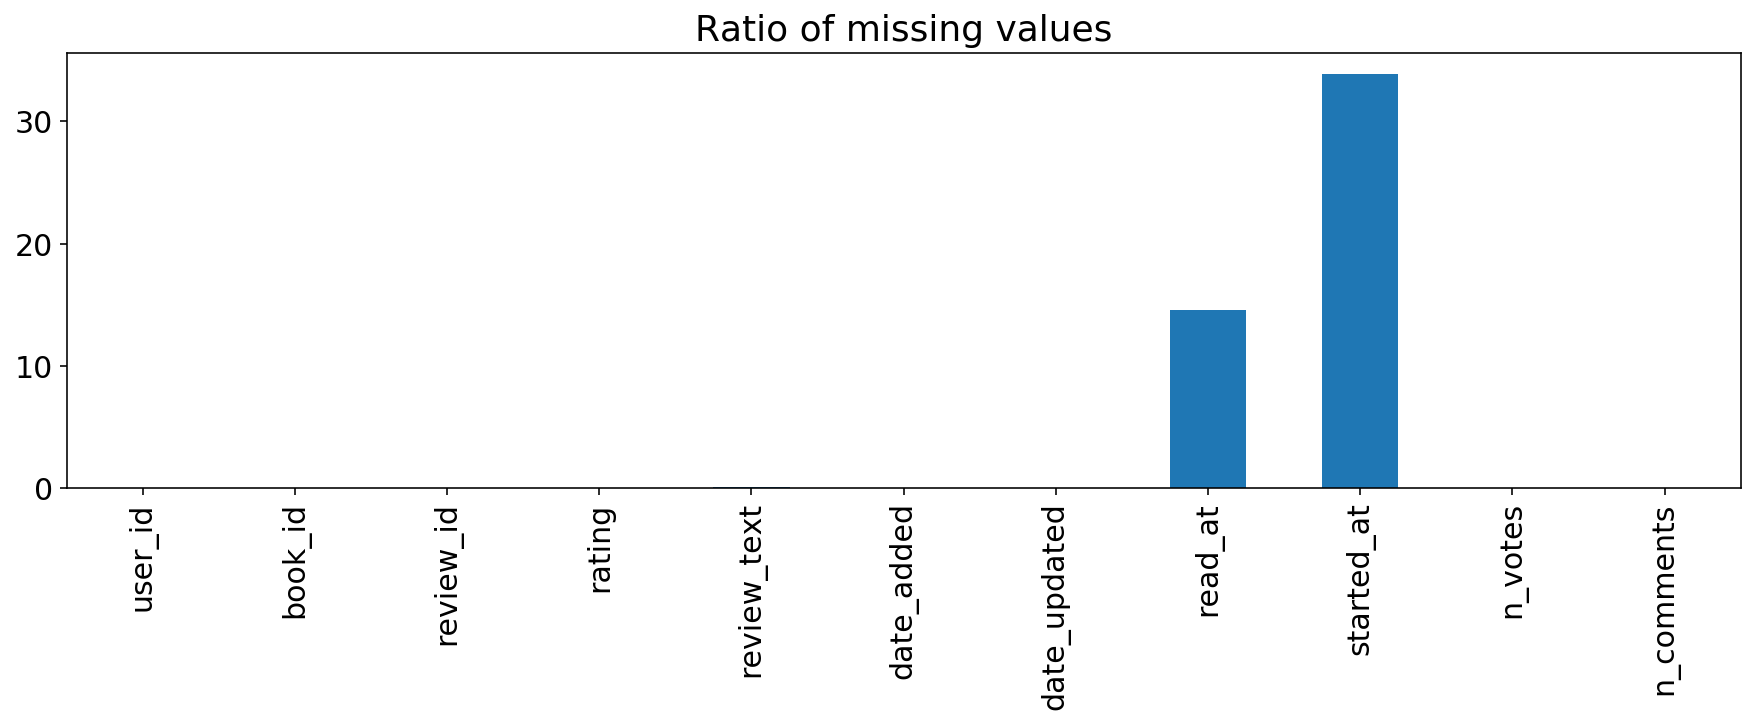

In [91]:
plt.figure(figsize=(15,4))
reviews.isna().sum().map(lambda x: (x / reviews.shape[0])* 100).plot(kind='bar',title = 'Ratio of missing values')

There are some missing values in 'read_at' and 'started_at' columns. We arent going to use these columns, so we can drop them during preprocessing.

Now, let's have a better look at some interesting columns.

In [26]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389900 entries, 0 to 2389899
Data columns (total 11 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   user_id       object
 1   book_id       int64 
 2   review_id     object
 3   rating        int64 
 4   review_text   object
 5   date_added    object
 6   date_updated  object
 7   read_at       object
 8   started_at    object
 9   n_votes       int64 
 10  n_comments    int64 
dtypes: int64(4), object(7)
memory usage: 200.6+ MB


### Rating

count    2.389900e+06
mean     3.764296e+00
std      1.259770e+00
min      0.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64
Ratio of 5: 33.5698564793506%
Ratio of 4: 32.80957362232729%
Ratio of 2: 7.327001129754383%
Ratio of 3: 19.91648186116574%
Ratio of 1: 2.938574835767187%
Ratio of 0: 3.4385120716347966%


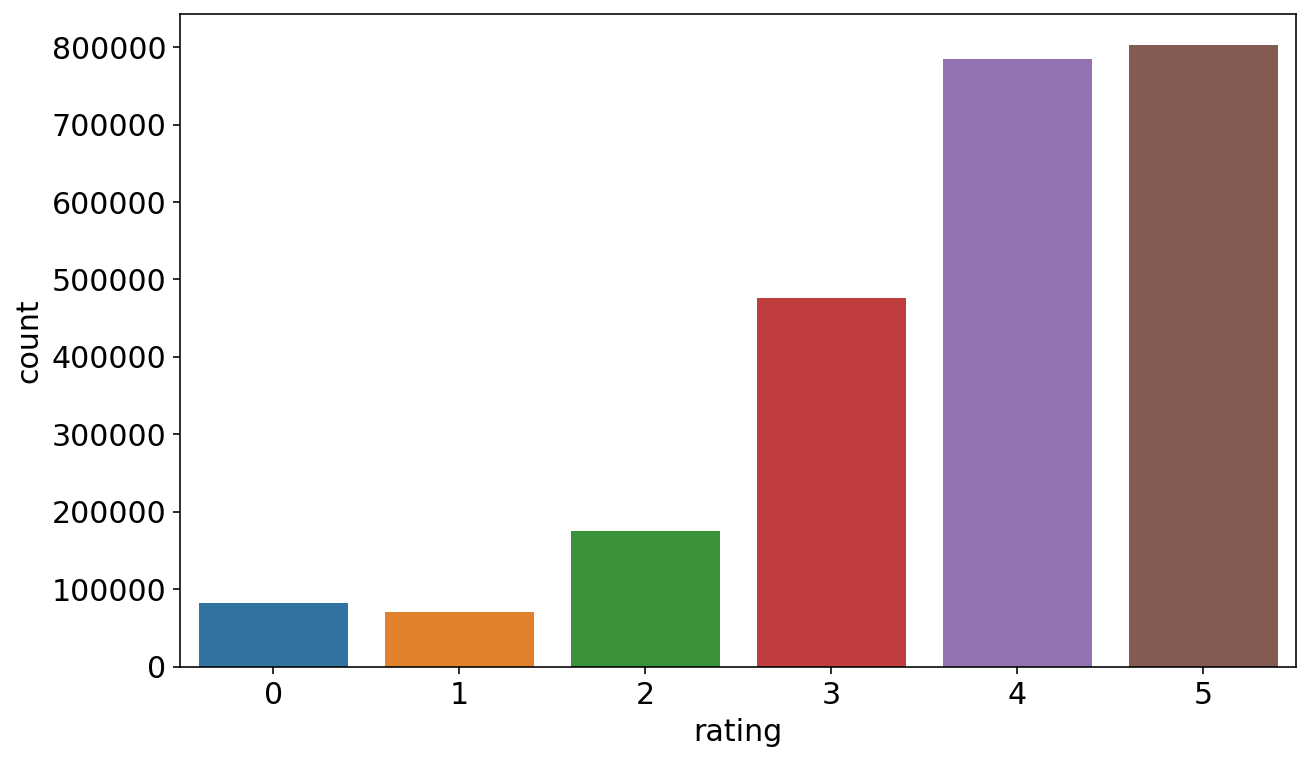

In [94]:
single_col.analyze_category(reviews, 'rating')

### Number of votes

count    2.389900e+06
mean     1.269322e+00
std      1.030308e+01
min     -3.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      3.942000e+03
Name: n_votes, dtype: float64

missing values: 0/2389900 (0.0%)
outliers upper: 210471/2389900 (8.806686472237333%)
outliers lower: 81/2389900 (0.003389263149085736%)



(<Figure size 1080x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8ccb2b2e0>,
       dtype=object))

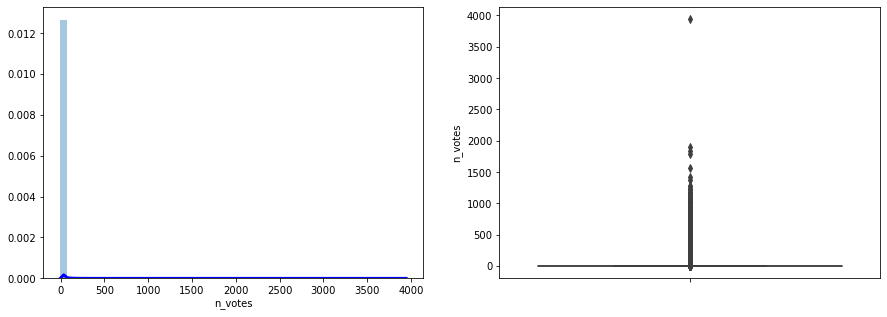

In [33]:
single_col.analyze_numeric(rev,'n_votes')

### Review text

Now, lets have a look at some text reviews.

In [108]:
reviews['word_count'] = reviews['review_text'].apply(lambda x: len(str(x).split()))

In [109]:
reviews[['review_text','word_count']].head()

,review_text,word_count
0,I cracked and finally picked this up. Very enj...,241
1,I read this book because my fifth grade son wa...,43
2,Though the book started out slow and only star...,21
3,"*Update - 10/27/13* - After some sleep, I thin...",359
4,"This is a moving, heartbreaking, view into a l...",103


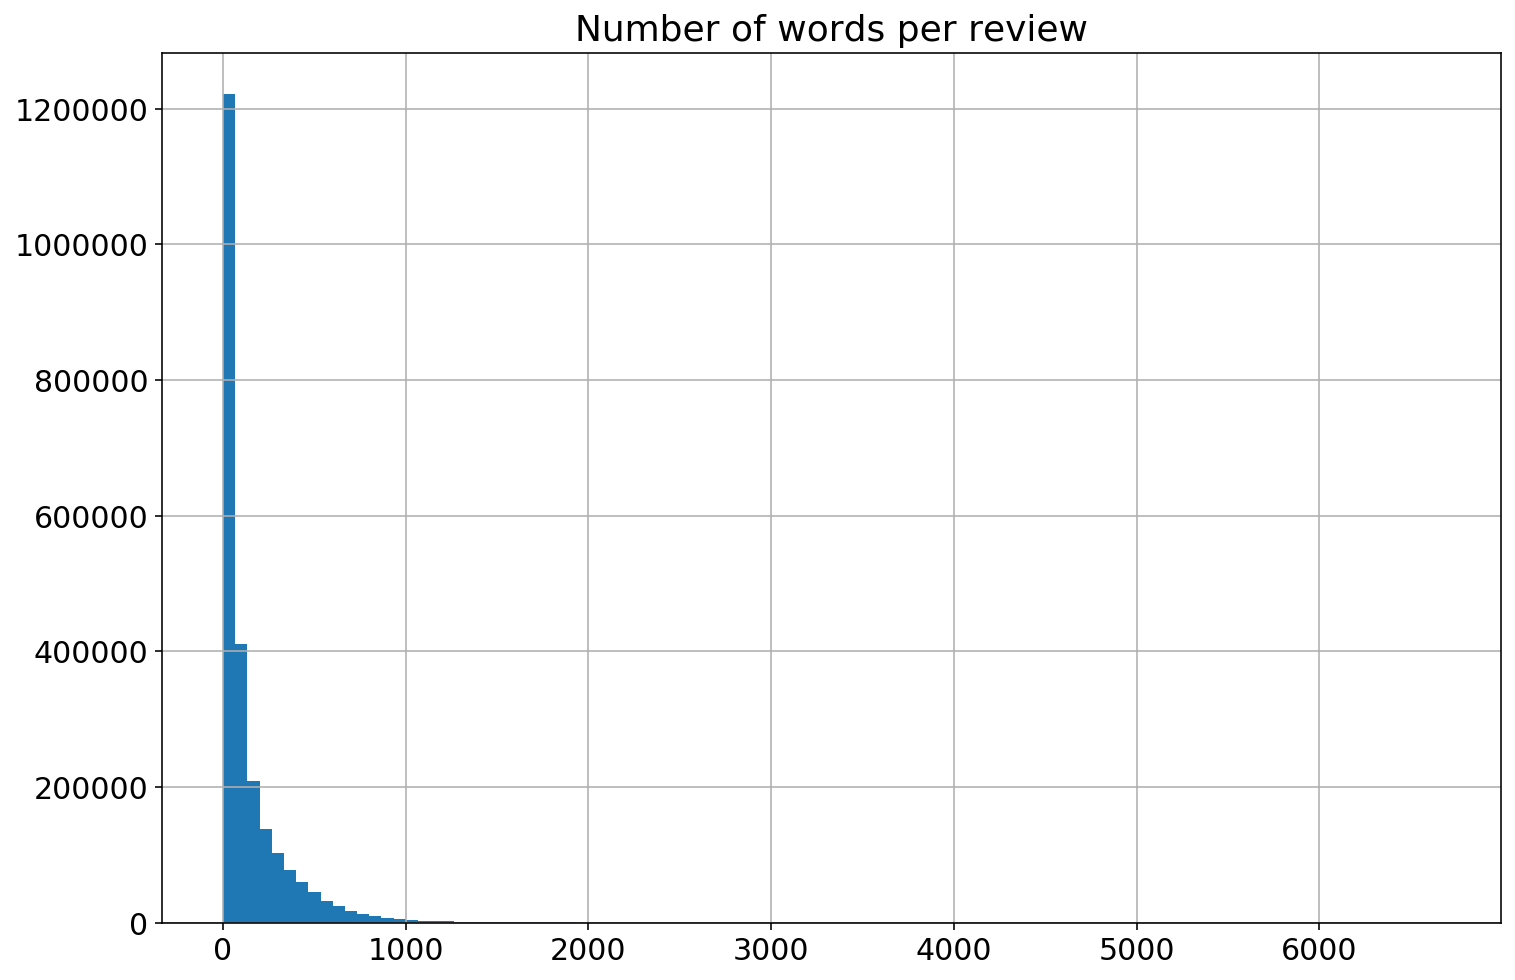

In [110]:
reviews.hist(column='word_count', bins=100, figsize=(12,8))
plt.title('Number of words per review');

Reviews with the highest number of words can be interesting:

In [114]:
reviews.word_count.sort_values(ascending= False)[:1000]

954552     6664
1878031    5454
2320808    3872
550373     3802
2320809    3748
           ... 
222189     1980
836803     1980
289512     1980
927573     1979
2371915    1979
Name: word_count, Length: 1000, dtype: int64

In [121]:
reviews.loc[954552].review_text[:1000]

'Cover = <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <3 <

In [122]:
reviews.loc[1878031].review_text[:1000]

'TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KIT TY AND KI

As we can see same of the longest reviews doesn't contain any useful informations, so we will deal with them during preprocessing.

In [105]:
plt.rcParams['figure.figsize'] = (20, 20)


Now we can check some of the shortest reviews. Most probably it will be reviews containing only one word.

In [124]:
reviews.word_count.sort_values(ascending= True)[:1000]

1808498    1
1171382    1
1171420    1
1171455    1
1171489    1
          ..
1195584    1
243760     1
1192927    1
244842     1
244841     1
Name: word_count, Length: 1000, dtype: int64

In [127]:
reviews.loc[1171420].review_text[:1000]

'Amazing'

In [128]:
reviews.loc[1195584].review_text[:1000]

'Terrible.'

In [129]:
reviews.loc[1808498].review_text[:1000]

'https://charlottelousieprince.wordpre...'

During preprocessing we need to take care of reviews that contains links, special characters or are useless because of their content.

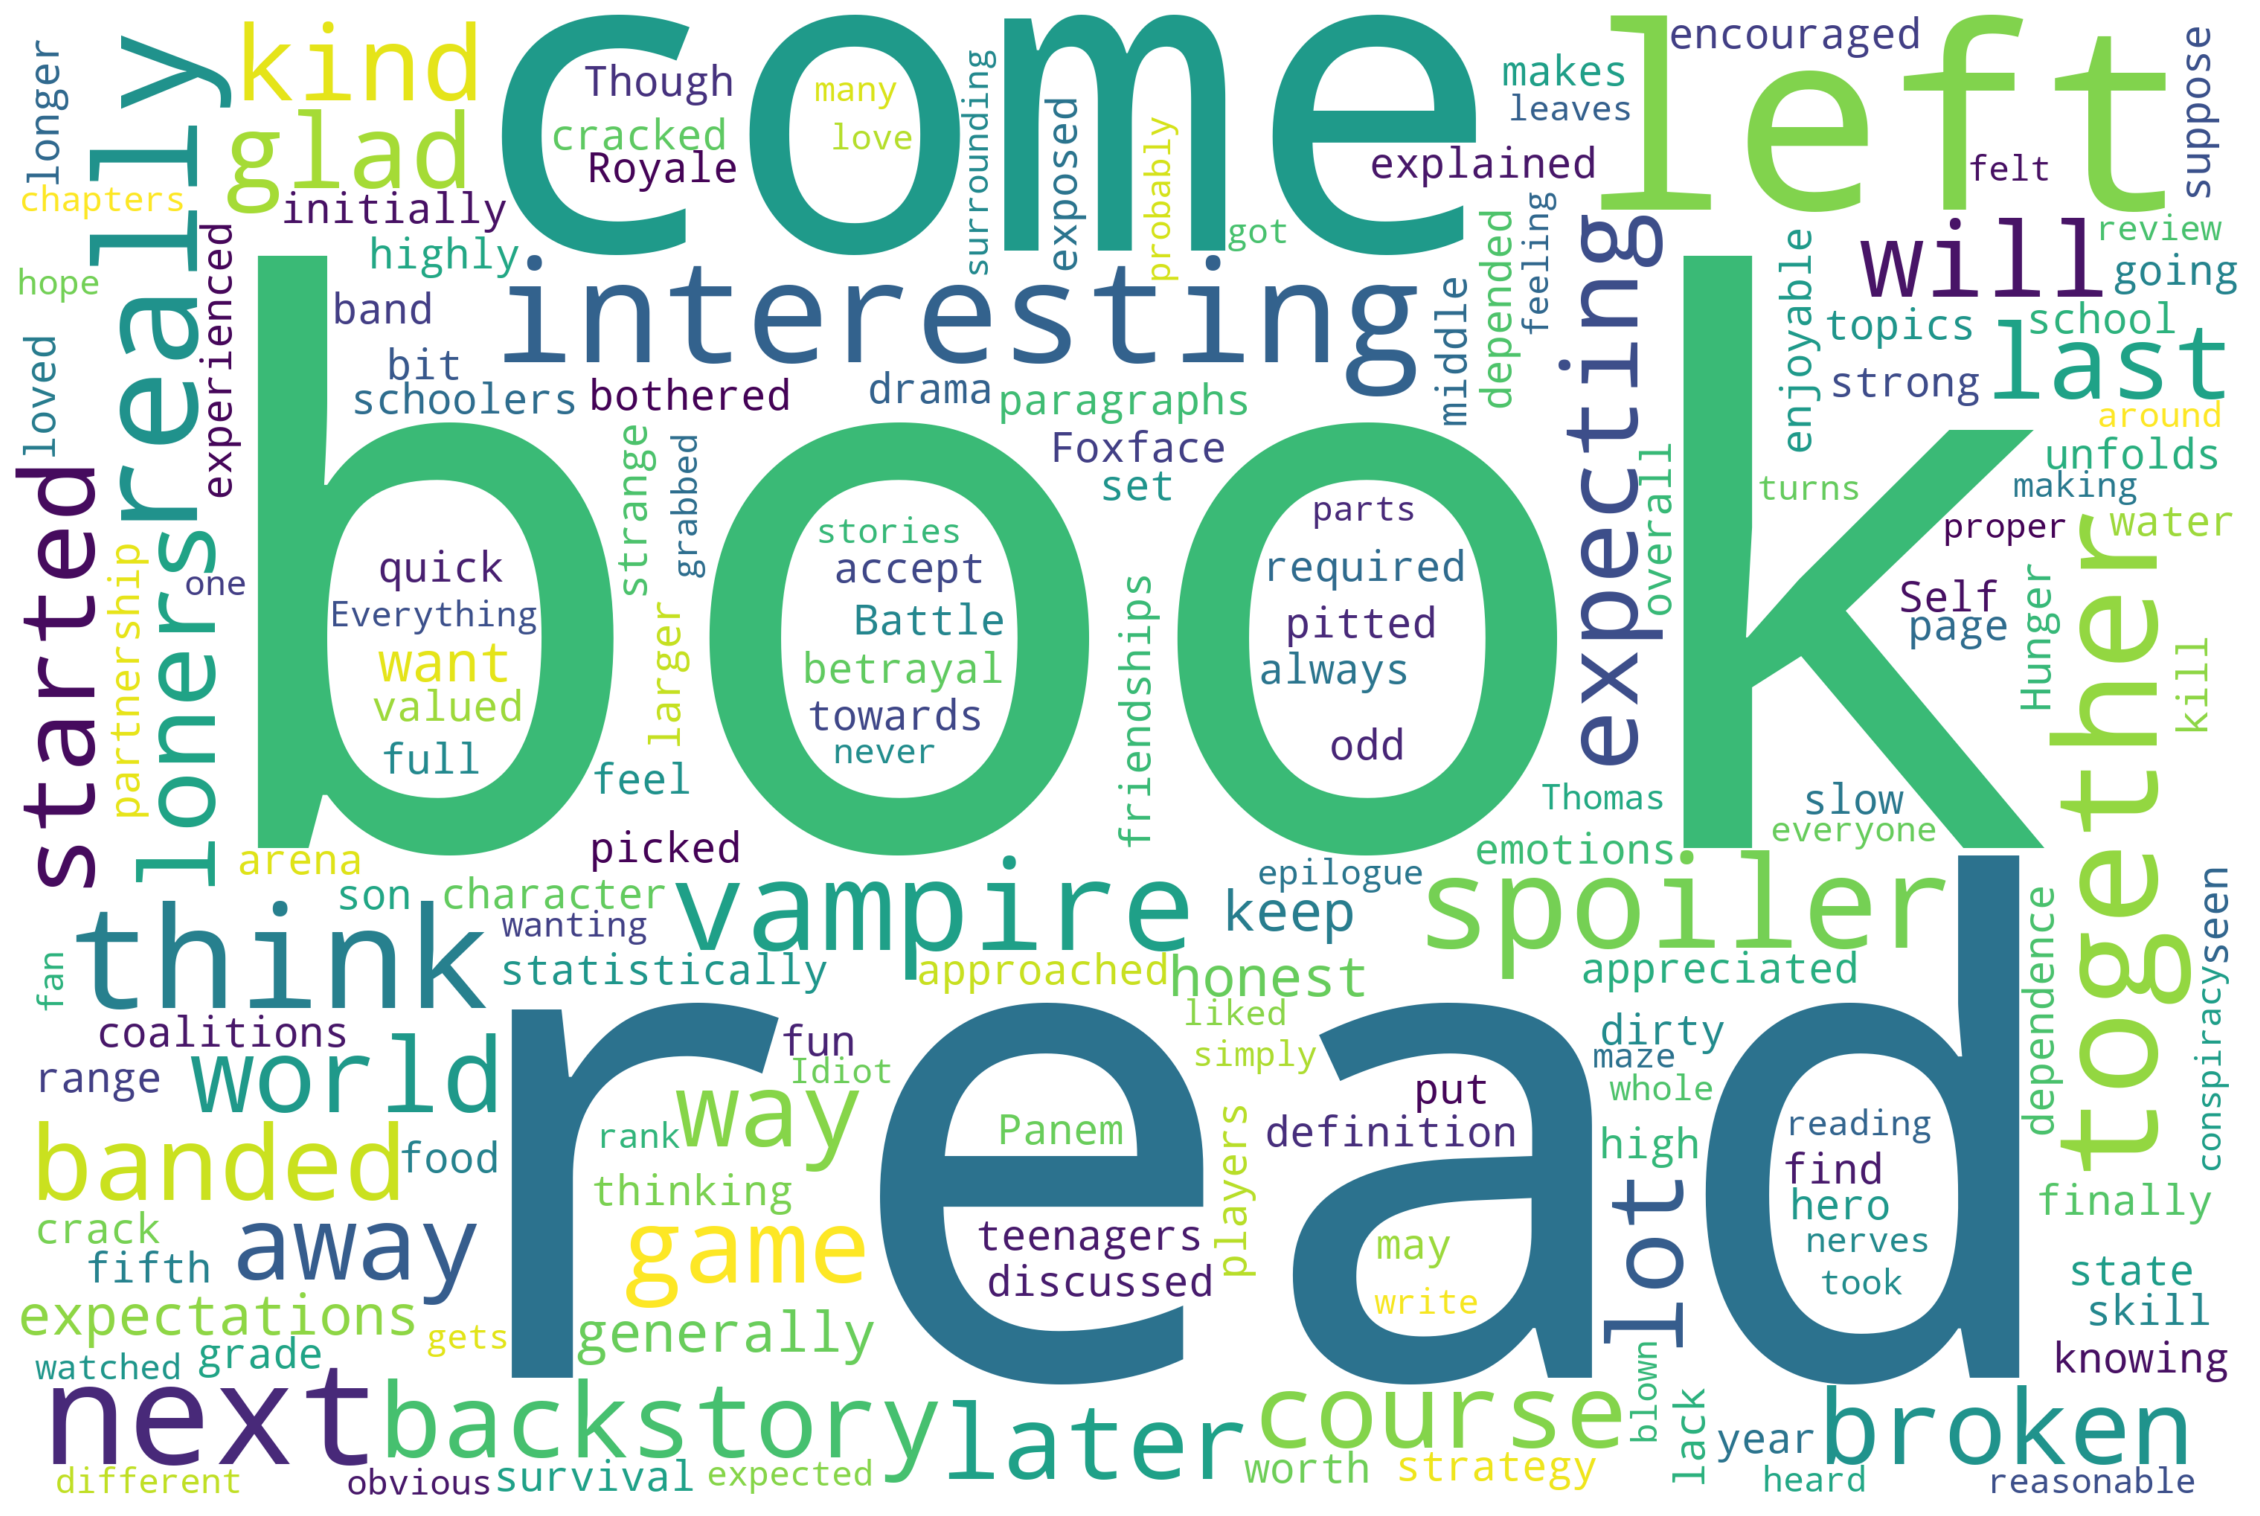

In [106]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = reviews.review_text.values
wordcloud = WordCloud(
    max_words=500,
    width=3000,
    height=2000,
    background_color='white',
    stopwords=STOPWORDS).generate(str(text))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

From the wordcloud, we can see that reviews contain maily words related to books, but also some generic words.

The interesting numberic columns:
- n_votes - this is the property, what we want to predict
- rating - how the user rated the book

The interesting columns, whose need preprocessing:
- review_text

## Interactions

In [190]:
intr = pd.read_csv('../data/interactions.csv', nrows=100000)

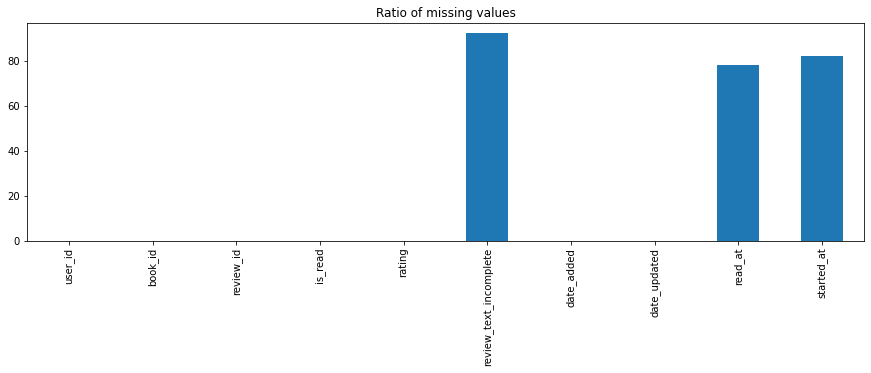

In [50]:
plt.figure(figsize=(15,4))
intr.isna().sum().map(lambda x: (x / intr.shape[0])* 100).plot(kind='bar',title = 'Ratio of missing values')

In [45]:
intr.head(10)

,user_id,book_id,review_id,is_read,rating,review_text_incomplete,date_added,date_updated,read_at,started_at
0,8842281e1d1347389f2ab93d60773d4d,18667753,be53fe83a6fc83474052f84692f6e90a,False,0,NaN,Wed Mar 29 00:12:52 -0700 2017,Wed Mar 29 00:12:52 -0700 2017,NaN,NaN
1,8842281e1d1347389f2ab93d60773d4d,428263,2030f56879ebcc307a4b9cd8c83200e8,False,0,NaN,Mon Mar 27 22:01:42 -0700 2017,Mon Mar 27 22:01:42 -0700 2017,NaN,NaN
2,8842281e1d1347389f2ab93d60773d4d,11387515,2fd3cd1acb30b099c135e358669639da,False,0,NaN,Thu Jan 26 13:35:10 -0800 2017,Thu Jan 26 13:35:10 -0800 2017,NaN,NaN
3,8842281e1d1347389f2ab93d60773d4d,8684868,d29b8238762d70b7c2b67941bc81fbe0,True,3,NaN,Tue Dec 17 13:42:25 -0800 2013,Tue Dec 17 13:47:26 -0800 2013,Sun Dec 15 00:00:00 -0800 2013,Sat Dec 14 00:00:00 -0800 2013
4,8842281e1d1347389f2ab93d60773d4d,8423493,357c8c178fd0e06cff5c025649231672,True,2,NaN,Sun Dec 08 01:26:12 -0800 2013,Tue Dec 27 05:37:48 -0800 2016,Tue Dec 10 00:00:00 -0800 2013,NaN
5,8842281e1d1347389f2ab93d60773d4d,87976,e6306259819c47f278e78d32a1b73ddf,True,5,NaN,Wed Oct 17 17:49:11 -0700 2012,Wed Oct 17 17:49:11 -0700 2012,NaN,NaN
6,8842281e1d1347389f2ab93d60773d4d,18116,8aa100c7b681e9fedbe2c6bd2c25696a,True,5,NaN,Fri Apr 29 13:14:05 -0700 2011,Fri Apr 29 13:14:05 -0700 2011,NaN,NaN
7,8842281e1d1347389f2ab93d60773d4d,2767052,248c011811e945eca861b5c31a549291,True,5,I cracked and finally picked this up. Very enj...,Wed Jan 13 13:38:25 -0800 2010,Wed Mar 22 11:46:36 -0700 2017,Sun Mar 25 00:00:00 -0700 2012,Fri Mar 23 00:00:00 -0700 2012
8,8842281e1d1347389f2ab93d60773d4d,119324,ec40ca421b13ee6ae810613319681ecb,True,5,NaN,Wed Dec 26 17:20:57 -0800 2007,Wed Mar 22 11:45:53 -0700 2017,Wed Jan 02 13:19:47 -0800 2008,NaN
9,8842281e1d1347389f2ab93d60773d4d,50,825490f5c1a288921599ca2565947163,True,5,NaN,Tue Aug 29 11:20:01 -0700 2006,Wed Mar 22 11:44:07 -0700 2017,NaN,NaN


In [36]:
intr.describe(include='all')

,user_id,book_id,review_id,is_read,rating,review_text_incomplete,date_added,date_updated,read_at,started_at
count,100000,1.000000e+05,100000,100000,100000.000000,7922,100000,100000,22055,17772
unique,1302,NaN,100000,2,NaN,7821,98934,98635,15447,10702
top,f8a89075dc6de14857561522e729f82c,NaN,5c394e8593ddfa2db1bcad40816e8296,False,NaN,This book is on the bibliography of books chal...,Fri Jun 08 12:48:05 -0700 2012,Mon Jul 01 01:03:41 -0700 2013,Fri Jan 01 00:00:00 -0800 2016,Sat Jun 03 00:00:00 -0700 2017
freq,2528,NaN,1,55082,NaN,26,12,34,130,29
mean,NaN,1.199138e+07,NaN,NaN,1.643070,NaN,NaN,NaN,NaN,NaN
std,NaN,8.973618e+06,NaN,NaN,2.022175,NaN,NaN,NaN,NaN,NaN
min,NaN,5.000000e+01,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,5.135798e+06,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.138430e+07,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.792690e+07,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN


count     100000
unique         2
top        False
freq       55082
Name: is_read, dtype: object
Ratio of False: 55.082%
Ratio of True: 44.918%


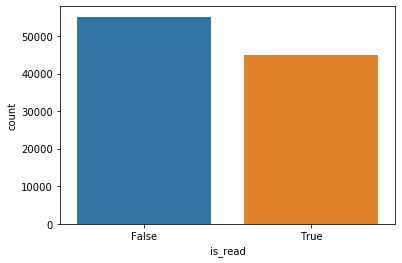

In [37]:
single_col.analyze_category(intr, 'is_read')

count    100000.000000
mean          1.643070
std           2.022175
min           0.000000
25%           0.000000
50%           0.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64
Ratio of 0: 57.537%
Ratio of 3: 9.876%
Ratio of 2: 2.946%
Ratio of 5: 13.211%
Ratio of 4: 15.434%
Ratio of 1: 0.996%


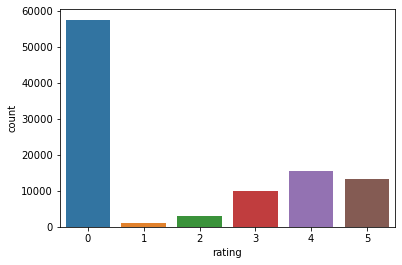

In [39]:
single_col.analyze_category(intr, 'rating')

0 indicates 'not provided'

### Interactions without zeros

In [215]:
intr_overall_len = 0
chunksize = 10 ** 6
intr_filtered = pd.DataFrame(columns = intr.columns) 
for chunk in pd.read_csv('../data/interactions.csv', chunksize=chunksize):
    intr_overall_len += chunk.shape[0]
    asd = chunk
    intr_filtered = intr_filtered.append(chunk[chunk.rating != 0])

In [223]:
intr_overall_len

34919254

In [217]:
intr_filtered.head(3)

,user_id,book_id,review_id,is_read,rating,review_text_incomplete,date_added,date_updated,read_at,started_at
3,8842281e1d1347389f2ab93d60773d4d,8684868,d29b8238762d70b7c2b67941bc81fbe0,True,3,NaN,Tue Dec 17 13:42:25 -0800 2013,Tue Dec 17 13:47:26 -0800 2013,Sun Dec 15 00:00:00 -0800 2013,Sat Dec 14 00:00:00 -0800 2013
4,8842281e1d1347389f2ab93d60773d4d,8423493,357c8c178fd0e06cff5c025649231672,True,2,NaN,Sun Dec 08 01:26:12 -0800 2013,Tue Dec 27 05:37:48 -0800 2016,Tue Dec 10 00:00:00 -0800 2013,NaN
5,8842281e1d1347389f2ab93d60773d4d,87976,e6306259819c47f278e78d32a1b73ddf,True,5,NaN,Wed Oct 17 17:49:11 -0700 2012,Wed Oct 17 17:49:11 -0700 2012,NaN,NaN


In [220]:
intr_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14731908 entries, 3 to 34919253
Data columns (total 10 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   user_id                 object
 1   book_id                 object
 2   review_id               object
 3   is_read                 object
 4   rating                  object
 5   review_text_incomplete  object
 6   date_added              object
 7   date_updated            object
 8   read_at                 object
 9   started_at              object
dtypes: object(10)
memory usage: 1.2+ GB


count     14731908
unique           5
top              5
freq       5094234
Name: rating, dtype: int64
Ratio of 3: 22.01657110538567%
Ratio of 2: 6.6131759715034875%
Ratio of 5: 34.57959417069398%
Ratio of 4: 34.33707975911878%
Ratio of 1: 2.4535789932980845%


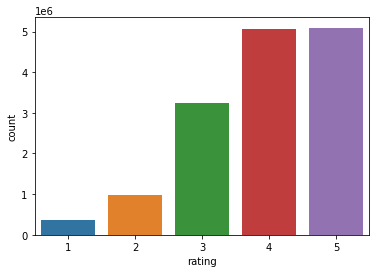

In [222]:
single_col.analyze_category(intr_filtered, 'rating')

count     14731908
unique           1
top           True
freq      14731908
Name: is_read, dtype: object
Ratio of True: 100.0%


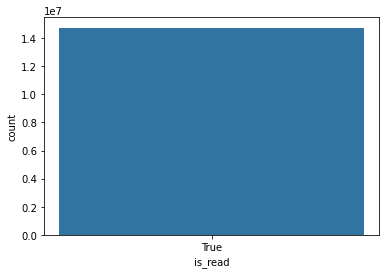

In [221]:
single_col.analyze_category(intr_filtered, 'is_read')

ratings are given only after reading the books, at least in the dataset are only ratings, where the book was avctually read